In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,ttest_ind,spearmanr
from adjustText import adjust_text
from tabulate import tabulate


In [2]:
DATASET = 'DatasetPro12.0.csv'

In [3]:
data = pd.read_csv(DATASET)

### Student T-test, log2FC, p-value Lipidos

In [7]:
DATASET = 'DatasetPro13.0.csv'
data = pd.read_csv(DATASET)

df_cn_mci = pd.DataFrame()

# Assign values to columns in the DataFrame
df_cn_mci['Feature'] = data.columns[139:920]
df_cn_mci['log2FC'] = None
df_cn_mci['p_value'] = None
df_cn_mci['student T-test'] = None


# Loop through each feature column and calculate correlations
for feature in df_cn_mci['Feature']:
    # cn_data = data.loc[data['Group'].isin(['CN', 'MCI']), feature]
    cn_data = data[data['Group'] == 'CN'][feature]
    mci_data = data[data['Group'] == 'MCI'][feature]
    if len(cn_data) > len(mci_data):
        cn_data = cn_data[:len(mci_data)]
    else:
        mci_data = mci_data[:len(cn_data)]

    fold_change_CN_MCI = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(mci_data)))
    
    t_statistic_lipid_CN_MCI, p_value_lipid_CN_MCI = ttest_ind(cn_data, mci_data)

    # Update the DataFrame with the correlation and p-value
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'log2FC'] = fold_change_CN_MCI
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'p_value'] = p_value_lipid_CN_MCI
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'student T-test'] = t_statistic_lipid_CN_MCI
# print(tabulate(df_cn_mci, headers = 'keys', tablefmt = 'psql'))

#---------------------------------------------------------------------------------------------------------------
df_cn_ad = pd.DataFrame()

# Assign values to columns in the DataFrame
df_cn_ad['Feature'] = data.columns[139:920]
df_cn_ad['log2FC'] = None
df_cn_ad['p_value'] = None
df_cn_ad['student T-test'] = None

for feature in df_cn_ad['Feature']:
    cn_data = data[data['Group'] == 'CN'][feature]
    ad_data = data[data['Group'] == 'AD'][feature]

    if len(cn_data) > len(ad_data):
        cn_data = cn_data[:len(ad_data)]
    else:
        ad_data = ad_data[:len(cn_data)]

    fold_change_CN_AD = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(ad_data)))

    t_statistic_lipid_CN_AD, p_value_lipid_CN_AD = ttest_ind(ad_data, cn_data)

    
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'log2FC'] = fold_change_CN_AD
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'p_value'] = p_value_lipid_CN_AD
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'student T-test'] = t_statistic_lipid_CN_AD

#-------------------------------------------------------------------------------------------------------------------
df_mci_ad = pd.DataFrame()

# Assign values to columns in the DataFrame
df_mci_ad['Feature'] = data.columns[139:920]
df_mci_ad['log2FC'] = None
df_mci_ad['p_value'] = None
df_mci_ad['student T-test'] = None

for feature in df_mci_ad['Feature']:
    mci_data = data[data['Group'] == 'MCI'][feature]
    ad_data = data[data['Group'] == 'AD'][feature]

    if len(mci_data) > len(ad_data):
        mci_data = mci_data[:len(ad_data)]
    else:
        ad_data = ad_data[:len(mci_data)]

    fold_change_MCI_AD = (np.log2(np.mean(mci_data))) - (np.log2(np.mean(ad_data)))

    t_statistic_lipid_MCI_AD, p_value_lipid_MCI_AD = ttest_ind(mci_data, ad_data)

    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'log2FC'] = fold_change_MCI_AD
    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'p_value'] = p_value_lipid_MCI_AD
    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'student T-test'] = t_statistic_lipid_MCI_AD
df_mci_ad= df_mci_ad.sort_values(by='log2FC', ascending=False)
df_cn_ad = df_cn_ad.sort_values(by='log2FC', ascending=False)
df_cn_mci = df_cn_mci.sort_values(by='log2FC', ascending=False)

display(pd.concat([df_mci_ad.head(5), df_mci_ad.tail(5)]))
display(pd.concat([df_cn_ad.head(5), df_cn_ad.tail(5)]))
display(pd.concat([df_cn_mci.head(5), df_cn_mci.tail(5)]))

df_mci_ad.to_csv('Statistics/test/mci_ad_LS.csv', index=False)
df_cn_ad.to_csv('Statistics/test/cn_ad_LS.csv', index=False)
df_cn_mci.to_csv('Statistics/test/cn_mci_LS.csv', index=False)

C:\Users\ciara\AppData\Local\Temp\ipykernel_16584\1739458108.py:23: RuntimeWarning: invalid value encountered in log2
  fold_change_CN_MCI = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(mci_data)))
C:\Users\ciara\AppData\Local\Temp\ipykernel_16584\1739458108.py:51: RuntimeWarning: invalid value encountered in log2
  fold_change_CN_AD = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(ad_data)))
C:\Users\ciara\AppData\Local\Temp\ipykernel_16584\1739458108.py:78: RuntimeWarning: invalid value encountered in log2
  fold_change_MCI_AD = (np.log2(np.mean(mci_data))) - (np.log2(np.mean(ad_data)))


,Feature,log2FC,p_value,student T-test
238,PC.O.18.0.22.6.%mol,6.891833,0.268895,1.106379
639,DG.18.1_22.5.%mol,5.602551,0.524357,0.636923
167,PC.15.MHDA_18.2.%mol,4.331522,0.004323,2.861763
191,PC.17.1_18.2.%mol,3.542571,0.00031,3.622701
528,CE.18.1.%mol,3.217276,0.838687,0.203639
770,TG.O.54.4...NL.17.1.%mol,NaN,0.094575,-1.673728
772,UBIQUINONE%mol,NaN,0.000001,4.864571
777,LPC.20.4....OH.%mol,NaN,0.088149,-1.707328
778,LPC.22.6....OH.%mol,NaN,0.557458,-0.586867
779,PC.34.2....OH.%mol,NaN,0.263688,1.118504


,Feature,log2FC,p_value,student T-test
701,TG.50.3...NL.18.3.%mol,6.347151,0.272344,-1.098438
359,PE.16.0_16.1.%mol,5.5874,0.41485,-0.815814
524,CE.16.2.%mol,4.536181,0.013279,-2.481718
528,CE.18.1.%mol,3.954041,0.709126,-0.373163
275,PC.P.38.5...A.%mol,3.829739,0.045884,-1.999571
776,LPC.18.2....OH.%mol,NaN,0.134063,1.49979
777,LPC.20.4....OH.%mol,NaN,0.142791,1.466921
778,LPC.22.6....OH.%mol,NaN,0.73802,0.334592
779,PC.34.2....OH.%mol,NaN,0.01085,-2.553468
780,PC.36.4....OH.%mol,NaN,0.011486,2.533399


,Feature,log2FC,p_value,student T-test
743,TG.56.7...NL.20.5.%mol,5.098905,0.088162,1.706207
458,PE.P.20.1.22.6.%mol,4.929678,0.066752,1.834578
268,PC.P.18.0.22.6.%mol,4.921467,0.068845,1.820648
428,PE.P.18.0.20.3...B.%mol,4.690477,0.069066,1.819199
262,PC.P.16.0.22.6.%mol,4.486391,0.024851,2.245812
776,LPC.18.2....OH.%mol,NaN,0.007135,-2.693893
777,LPC.20.4....OH.%mol,NaN,0.548221,-0.600555
778,LPC.22.6....OH.%mol,NaN,0.131748,1.508009
779,PC.34.2....OH.%mol,NaN,0.102441,1.634061
780,PC.36.4....OH.%mol,NaN,0.651033,0.452412


### Student T-test, log2FC, p-value Volumes

In [46]:
DATASET = 'DatasetPro12.0.csv'
data = pd.read_csv(DATASET)

df_cn_mci = pd.DataFrame()

data = data.drop(data.columns[9:130], axis=1)

data.columns = data.columns.str.replace(r'(_ICV\b)', '', regex=True)

regions = pd.read_csv('regions.csv')

filtered_regions = regions[regions['Check'] == 'x']
regions = filtered_regions['Regions'].tolist()

df_cn_mci['Feature'] = regions
df_cn_mci['log2FC'] = None
df_cn_mci['p_value'] = None
df_cn_mci['student T-test'] = None

# Loop through each feature column and calculate correlations
for feature in df_cn_mci['Feature']:
    # cn_data = data.loc[data['Group'].isin(['CN', 'MCI']), feature]
    cn_data = data[data['Group'] == 'CN'][feature]
    mci_data = data[data['Group'] == 'MCI'][feature]
    if len(cn_data) > len(mci_data):
        cn_data = cn_data[:len(mci_data)]
    else:
        mci_data = mci_data[:len(cn_data)]

    fold_change_CN_MCI = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(mci_data)))
    
    t_statistic_lipid_CN_MCI, p_value_lipid_CN_MCI = ttest_ind(cn_data, mci_data)

    # Update the DataFrame with the correlation and p-value
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'log2FC'] = fold_change_CN_MCI
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'p_value'] = p_value_lipid_CN_MCI
    df_cn_mci.loc[df_cn_mci['Feature'] == feature, 'student T-test'] = t_statistic_lipid_CN_MCI
# print(tabulate(df_cn_mci, headers = 'keys', tablefmt = 'psql'))

#---------------------------------------------------------------------------------------------------------------
df_cn_ad = pd.DataFrame()

# Assign values to columns in the DataFrame
df_cn_ad['Feature'] = regions
df_cn_ad['log2FC'] = None
df_cn_ad['p_value'] = None
df_cn_ad['student T-test'] = None

for feature in df_cn_ad['Feature']:
    cn_data = data[data['Group'] == 'CN'][feature]
    ad_data = data[data['Group'] == 'AD'][feature]

    if len(cn_data) > len(ad_data):
        cn_data = cn_data[:len(ad_data)]
    else:
        ad_data = ad_data[:len(cn_data)]

    fold_change_CN_AD = (np.log2(np.mean(cn_data))) - (np.log2(np.mean(ad_data)))

    t_statistic_lipid_CN_AD, p_value_lipid_CN_AD = ttest_ind(ad_data, cn_data)

    
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'log2FC'] = fold_change_CN_AD
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'p_value'] = p_value_lipid_CN_AD
    df_cn_ad.loc[df_cn_ad['Feature'] == feature, 'student T-test'] = t_statistic_lipid_CN_AD

#-------------------------------------------------------------------------------------------------------------------
df_mci_ad = pd.DataFrame()

# Assign values to columns in the DataFrame
df_mci_ad['Feature'] = regions
df_mci_ad['log2FC'] = None
df_mci_ad['p_value'] = None
df_mci_ad['student T-test'] = None

for feature in df_mci_ad['Feature']:
    mci_data = data[data['Group'] == 'MCI'][feature]
    ad_data = data[data['Group'] == 'AD'][feature]

    if len(mci_data) > len(ad_data):
        mci_data = mci_data[:len(ad_data)]
    else:
        ad_data = ad_data[:len(mci_data)]

    fold_change_MCI_AD = (np.log2(np.mean(mci_data))) - (np.log2(np.mean(ad_data)))

    t_statistic_lipid_MCI_AD, p_value_lipid_MCI_AD = ttest_ind(mci_data, ad_data)

    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'log2FC'] = fold_change_MCI_AD
    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'p_value'] = p_value_lipid_MCI_AD
    df_mci_ad.loc[df_mci_ad['Feature'] == feature, 'student T-test'] = t_statistic_lipid_MCI_AD
df_mci_ad= df_mci_ad.sort_values(by='log2FC', ascending=False)
df_cn_ad = df_cn_ad.sort_values(by='log2FC', ascending=False)
df_cn_mci = df_cn_mci.sort_values(by='log2FC', ascending=False)

display(pd.concat([df_mci_ad.head(5), df_mci_ad.tail(5)]))
display(pd.concat([df_cn_ad.head(5), df_cn_ad.tail(5)]))
display(pd.concat([df_cn_mci.head(5), df_cn_mci.tail(5)]))

df_mci_ad.to_csv('Statistics/test/mci_ad_VOL.csv', index=False)
df_cn_ad.to_csv('Statistics/test/cn_ad_VOL.csv', index=False)
df_cn_mci.to_csv('Statistics/test/cn_mci_VOL.csv', index=False)

,Feature,log2FC,p-value,student T-test
34,lh_entorhinal_volume,0.187455,0.0,6.573409
3,rh_entorhinal_volume,0.185487,0.0,6.221942
70,Left-Amygdala,0.119311,0.0,5.279625
80,Right-Amygdala,0.112562,0.0,5.246744
37,lh_inferiortemporal_volume,0.100477,0.0,6.102854
62,Left-Cerebellum-White-Matter,-0.041856,0.001886,-3.117986
65,Left-Caudate,-0.043147,0.009123,-2.613772
85,CC_Mid_Posterior,-0.068122,0.017609,-2.378668
76,Right-Caudate,-0.068812,0.000057,-4.047691
83,WM-hypointensities,-0.321521,0.002926,-2.984642


,Feature,log2FC,p-value,student T-test
34,lh_entorhinal_volume,0.423906,0.0,-17.74084
3,rh_entorhinal_volume,0.423605,0.0,-16.89995
70,Left-Amygdala,0.344816,0.0,-18.926605
80,Right-Amygdala,0.299232,0.0,-16.957406
69,Left-Hippocampus,0.299151,0.0,-20.599372
33,lh_cuneus_volume,-0.023671,0.173724,1.361547
73,Right-Cerebellum-White-Matter,-0.023751,0.105088,1.622512
45,lh_paracentral_volume,-0.032143,0.011401,2.536012
62,Left-Cerebellum-White-Matter,-0.035806,0.006702,2.718401
83,WM-hypointensities,-0.702725,0.0,6.472286


,Feature,log2FC,p-value,student T-test
70,Left-Amygdala,0.274299,0.0,19.313874
3,rh_entorhinal_volume,0.272348,0.0,15.536601
79,Right-Hippocampus,0.254209,0.0,22.570502
69,Left-Hippocampus,0.249933,0.0,23.650301
80,Right-Amygdala,0.246151,0.0,18.702212
65,Left-Caudate,0.034147,0.001334,3.2141
0,rh_caudalanteriorcingulate_volume,0.031598,0.029999,2.172026
33,lh_cuneus_volume,0.025629,0.017597,2.376437
68,Brain-Stem,0.023858,0.00046,3.510145
83,WM-hypointensities,-0.529369,0.0,-6.569513


## Volcano Plots

### CN vs MCI

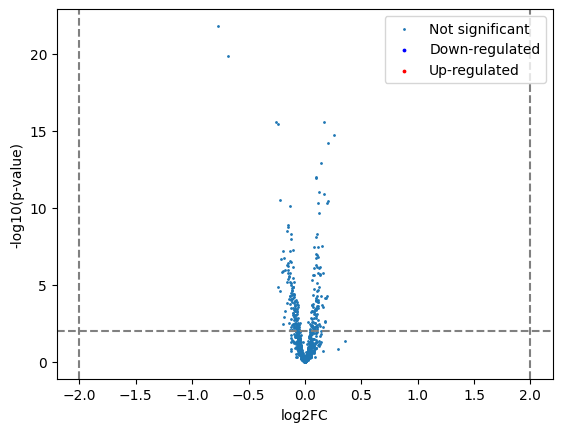

In [7]:
plt.scatter(x=df_cn_mci['log2FC'],y=df_cn_mci['p-value'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df_cn_mci[(df_cn_mci['log2FC']<=-2)&(df_cn_mci['p-value']<=0.01)]
up = df_cn_mci[(df_cn_mci['log2FC']>=2)&(df_cn_mci['p-value']<=0.01)]

plt.scatter(x=down['log2FC'],y=down['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FC'],y=up['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['log2FC'],y=-np.log10(r['p-value']),s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("log2FC")
plt.ylabel("-log10(p-value)")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

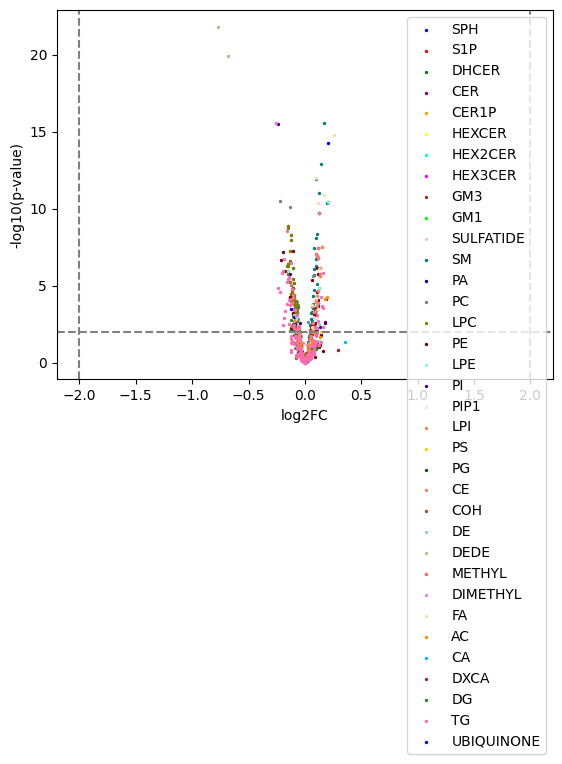

In [8]:
features = []
for feature in df_cn_mci['Feature']:
    match = re.search(r'^[^.]+', feature)
    i = match.group(0)
    if i not in features:
        features.append(i)

swap_dict = {
    'CA%mol': 'CA',
    'DXCA%mol': 'DXCA',
    'COH%mol': 'COH',
    'UBIQUINONE%mol': 'UBIQUINONE'
}

# Swap values in the list
features = [swap_dict.get(item, item) for item in features]

color_list = [
    'blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta',
    'brown', 'lime', 'pink', 'teal', 'navy', 'gray', 'olive', 'maroon',
    'aquamarine', 'indigo', 'lavender', 'coral', 'gold', 'darkgreen', 'salmon',
    'sienna', 'skyblue', 'tan', 'tomato', 'violet', 'wheat', 'darkorange', 'deepskyblue',
    'firebrick', 'forestgreen', 'hotpink'
]

feature_colors = {}
for idx, feature in enumerate(features):
    feature_colors[feature] = color_list[idx % len(color_list)]


texts = []
for j in feature_colors.keys():
    lista = pd.DataFrame()  # Ensure this is within the outer loop but before the inner loop
    for i, r in df_cn_mci.iterrows():
        match = re.search(j, r['Feature'])
        if match:
            lista = pd.concat([lista, r.to_frame().T], ignore_index=True)  # Use concat

    plt.scatter(x=lista['log2FC'],y=lista['p-value'].apply(lambda x:-np.log10(x)), s=2,color=feature_colors[j] ,label=j)

adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("log2FC")
plt.ylabel("-log10(p-value)")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

### CN vs AD

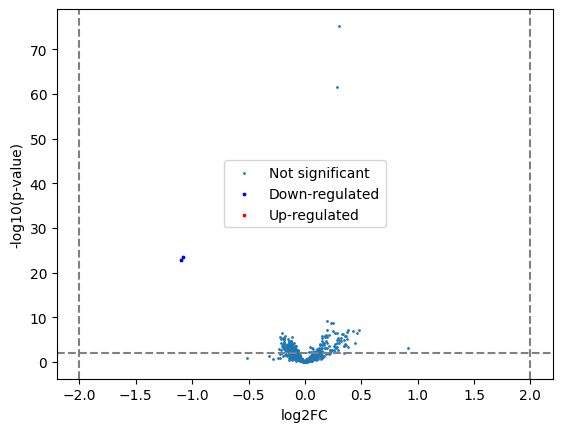

In [8]:
plt.scatter(x=df_cn_ad['log2FC'],y=df_cn_ad['p-value'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df_cn_ad[(df_cn_ad['log2FC']<=-1)&(df_cn_ad['p-value']<=0.01)]
up = df_cn_ad[(df_cn_ad['log2FC']>=1)&(df_cn_ad['p-value']<=0.01)]

plt.scatter(x=down['log2FC'],y=down['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FC'],y=up['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['log2FC'],y=-np.log10(r['p-value']),s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("log2FC")
plt.ylabel("-log10(p-value)")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

### MCI vs AD

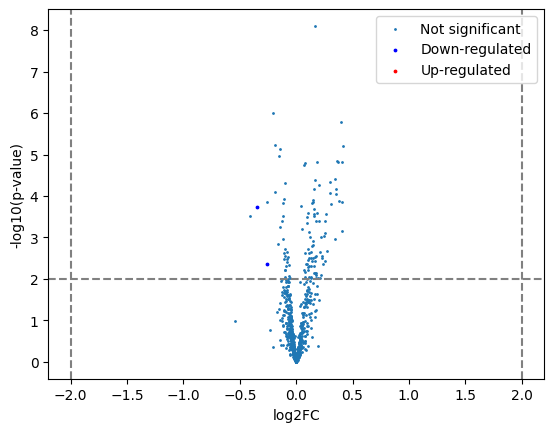

In [9]:
plt.scatter(x=df_mci_ad['log2FC'],y=df_mci_ad['p-value'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df_mci_ad[(df_cn_ad['log2FC']<=-1)&(df_mci_ad['p-value']<=0.01)]
up = df_mci_ad[(df_mci_ad['log2FC']>=1)&(df_mci_ad['p-value']<=0.01)]

plt.scatter(x=down['log2FC'],y=down['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FC'],y=up['p-value'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['log2FC'],y=-np.log10(r['p-value']),s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("log2FC")
plt.ylabel("-log10(p-value)")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()